In [1]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import configparser
import sys
import os
import matplotlib.animation as animation
from drl_grams import *

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [2]:
path = '/home/sofi/Documents/resultadosccad/'

In [3]:
dimensions = [8,12,16,20,24,32]
fidelities = pd.DataFrame()

fidelities = pd.DataFrame(columns=['chain_length', 'method', 'fid'])

for dimension in dimensions:
    directory = path + f'n{dimension}_og_zhangn{dimension}_off_size120'
    best_fids = np.loadtxt(directory + '/best_fidelities.txt', dtype=np.float32)
    print(f'best_fidelities: {best_fids}')
    for fid in best_fids:
        fidelities = pd.concat([fidelities, pd.DataFrame({'chain_length': [dimension], 'method': ['zhang'], 'fid': [fid]})], ignore_index=True)

best_fidelities: [0.98393846 0.9856909  0.9865095  0.9890827  0.98245454 0.9833503
 0.9831707  0.9837057  0.9835619  0.982932  ]
best_fidelities: [0.9642196  0.9608207  0.96165437 0.96119195 0.9634765  0.9650494
 0.96680003 0.9629114  0.96053743 0.9633292 ]
best_fidelities: [0.89449483 0.8929087  0.89018387 0.94992185 0.9074496  0.89276534
 0.8904655  0.8875089  0.88561773 0.89077204]
best_fidelities: [0.8516589  0.88299316 0.86813086 0.85092616 0.8563189  0.86988074
 0.8633186  0.8824746  0.8628589  0.84917396]
best_fidelities: [0.89719546 0.8833996  0.8847026  0.8824863  0.8720642  0.8708876
 0.87437344 0.92373663 0.8734612  0.87204427]
best_fidelities: [0.84739196 0.8562816  0.8467307  0.8849483  0.8626011  0.8597768
 0.8511055  0.84719026 0.853229   0.8667213 ]


/tmp/ipykernel_37177/312215829.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fidelities = pd.concat([fidelities, pd.DataFrame({'chain_length': [dimension], 'method': ['zhang'], 'fid': [fid]})], ignore_index=True)


In [4]:
ga_results = pd.read_csv('/home/sofi/Documents/resultadosccad/genetico/rew_based_zhang_v2/nvsmaxfid.dat', header=None,delimiter=' ', names=['chain_length', 'sample', 'fid','ttime', 'generations', 'cputime'])
ga_results['method'] = 'ga'

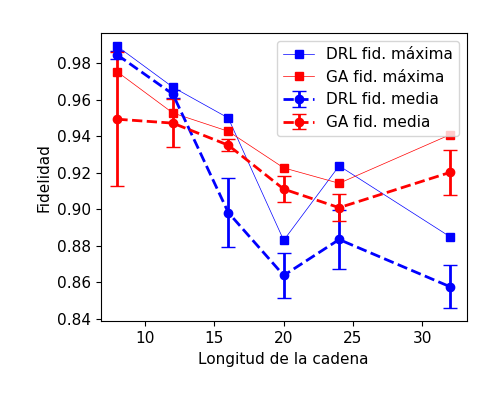

In [5]:
fs = 11
plt.figure(figsize=(5, 4))
grouped_df = fidelities.groupby('chain_length')
mean = grouped_df['fid'].mean()
std = grouped_df['fid'].std()
min_value = grouped_df['fid'].min()
max_value = grouped_df['fid'].max()
plt.errorbar(dimensions, mean, yerr=std, fmt='o--', label='DRL fid. media', color='blue', capsize=5)
plt.plot(dimensions, max_value, 's-', color='blue', label='DRL fid. máxima',linewidth=0.5)

#plt.scatter(fidelities['chain_length'], fidelities['fid'], color='skyblue',zorder=-1)
plt.xlabel('Longitud de la cadena')
plt.ylabel('Fidelidad')

grouped_df = ga_results.groupby('chain_length')
mean = grouped_df['fid'].mean()
std = grouped_df['fid'].std()
min_value = grouped_df['fid'].min()
max_value = grouped_df['fid'].max()
plt.errorbar([8,12,16,20,24,32], mean, yerr=std, fmt='o--', label='GA fid. media', color='red', capsize=5)
plt.plot([8,12,16,20,24,32], max_value, 's-', color='red', label='GA fid. máxima',linewidth=0.5)
plt.tight_layout(pad=2.0)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel('Longitud de la cadena', fontsize=fs)
plt.ylabel('Fidelidad', fontsize=fs)
#plt.scatter(fidelities['chain_length'], fidelities['fid'], color='skyblue',zorder=-1)
plt.legend(fontsize=fs)
plt.savefig('zhang_drl_ga_fidelidades.png', dpi=1600, bbox_inches='tight')

In [6]:
samples = np.arange(0,10,1)

ga_sequences = uniformize_data('ga',**{'directory': path + 'genetico/rbz_n16/', 'n':16})
zhang_sequences = uniformize_data('zhang',**{'file' : path + f'n16_og_zhangn16_off_size120/best_action_sequences.txt'})

print('ga_sequences', ga_sequences)

ga_sequences [[14.  8.  0. 11. 10.  0. 15. 10. 11. 11.  0.  9. 11.  1.  1. 15. 13.  3.
   2.  3. 14.  3.  0. 11.  6. 13. 15.  1. 11.  9. 11. 11.  9. 13. 11.  2.
   2. 11. 10.  6.  3.  3.  0. 11. 13.  9.  0. 11. 15. 11. 15.  4.  5.  1.
   7.  0.  7.  0.  2.  7.  0.  3.  0. 11. 10.  9.  9.  9. 11. 11. 11. 10.
  11.  7.  9. 10. 11.  9. 11. 11.]
 [12. 15. 14. 13.  0. 11. 15. 11. 15. 12. 15.  9.  0.  1.  1.  1. 15. 11.
   3.  3.  0. 12.  4.  7. 14. 11.  5. 15.  9.  2. 13. 11. 11.  0.  3.  2.
  15.  3. 14.  4.  7.  5.  6. 13.  0. 11. 15. 11.  3.  1.  6.  1.  7.  1.
   2. 15.  4.  1. 15.  0. 15.  5.  4. 10. 11. 11.  9. 12. 11. 11. 11. 11.
   6. 11. 15. 11.  0. 12. 11.  9.]
 [12.  0. 15. 15.  9. 15. 10. 11. 15. 15.  9. 15. 14. 15.  1. 15.  0. 15.
   2.  2.  8.  9.  0.  0.  6. 13. 11. 11. 11.  1. 13.  3.  3. 15.  0. 15.
  11. 10.  3. 12. 12.  0.  5. 13.  7. 15.  7. 11. 11. 15. 15. 15. 15.  5.
   5. 15.  0.  3.  2.  2.  2.  0.  0. 11. 10. 10. 11. 10. 11.  3. 12.  3.
  12. 14. 11. 12. 11. 11. 10.

In [7]:
def fid_evolution(
    action_sequence, nh, dt=0.15, b=100, label="", actions="original", add_natural=False
):

    action_sequence = [int(x) for x in action_sequence]
    t_steps = len(action_sequence) + 1

    # generar propagadores
    actions = action_selector(actions, b, nh)
    propagators = gen_props(actions, nh, dt)
    times = np.arange(0, t_steps, 1)

    # definicion del estado inicial e inicializacion de estados forzado y natural

    initial_state = np.zeros(nh, dtype=np.complex_)
    initial_state[0] = 1.0

    # inicializacion de estado forzado
    forced_state = initial_state

    # almacenar evolucion natural y evolucion forzada
    forced_evol = [state_fidelity(forced_state)]

    for action in action_sequence:

        forced_state = calculate_next_state(forced_state, action, propagators)
        forced_evol.append(state_fidelity(forced_state))

    max_forced = np.max(forced_evol)
    max_time = np.argmax(forced_evol)

    free_state = initial_state

    if add_natural:
        natural_evol = [state_fidelity(free_state)]

        nat_sequence = np.zeros(int(t_steps - 1), dtype=int)

        for action in nat_sequence:

            free_state = calculate_next_state(free_state, 0, propagators)
            natural_evol.append(state_fidelity(free_state))

        max_natural = np.max(natural_evol)



        return forced_evol,natural_evol
    
    else:
    
        return forced_evol

Eigenstate Propagation: correct
forced_evol [0.0, 1.8082477765725774e-50, 2.4903830534169045e-41, 1.9691976782783326e-35, 7.912746700715469e-33, 3.174980261870735e-31, 4.490745055996141e-27, 1.5850223793934922e-24, 2.8340030881886304e-24, 1.5747565341600318e-23, 4.344423072133761e-22, 6.441411550883989e-19, 1.0132027462459419e-18, 1.939104656730634e-18, 4.0969574788314373e-16, 7.254217572653285e-15, 6.288287154844109e-14, 2.4689655319732147e-13, 3.2914916728268513e-13, 1.1735260977786989e-12, 1.4275943198247995e-11, 8.79488643325316e-11, 3.0294731730388625e-10, 6.160499744601607e-10, 5.496548995015542e-10, 8.752340235708317e-10, 4.789996989464198e-09, 7.665414916256142e-09, 1.0209749560946684e-08, 7.530037797728857e-09, 7.041866105187311e-09, 5.945420357118551e-09, 1.2761406391085613e-08, 5.386647581578176e-08, 4.854307575121035e-07, 6.5950906747531e-07, 6.9772020472425794e-06, 4.152489288596578e-05, 4.5467881636032385e-05, 5.214928569311952e-05, 0.00030698957402447403, 0.0008407345440

/tmp/ipykernel_37177/3238536671.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


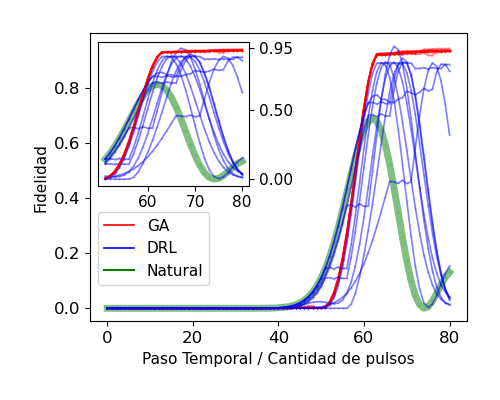

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D

plt.figure(figsize=(5, 4))

for sample in samples:
    forced_evol, natural_evol = fid_evolution(ga_sequences[sample][:], 16, dt=0.15, b=100, label="", actions="original", add_natural=True)
    print('forced_evol', forced_evol)
    plt.plot(forced_evol, '-o', label=f'GA {sample}', color='red', alpha=0.5, linewidth=1.2, markersize=0.2)
for sample in samples:
    forced_evol, natural_evol = fid_evolution(zhang_sequences[sample][:], 16, dt=0.15, b=100, label="", actions="original", add_natural=True)
    print('forced_evol', forced_evol)
    plt.plot(forced_evol, '-o', label=f'GA {sample}', color='blue', alpha=0.5, linewidth=1.2, markersize=0.2)

plt.plot(natural_evol, '-o', label='Natural', color='green', alpha=0.5, linewidth=5, markersize=0.2, zorder = -2)
# Mover etiquetas de los ejes al eje principal
plt.xlabel('Paso Temporal / Cantidad de pulsos', fontsize=fs)
plt.ylabel('Fidelidad', fontsize=fs)
# Create a personalized legend

legend_elements = [
    Line2D([0], [0], color='red', lw=1.2, label='GA'),
    Line2D([0], [0], color='blue', lw=1.2, label='DRL'),
    Line2D([0], [0], color='green', lw=1.5, label='Natural')
]
plt.legend(handles=legend_elements, fontsize=fs, loc='lower left', bbox_to_anchor=(0, 0.1))

# Agregar inset
ax_inset = inset_axes(plt.gca(), width="40%", height="50%", loc="upper left")
ax_inset.plot(range(len(forced_evol))[-30:],natural_evol[-30:], '-o', label='Natural', color='green', alpha=0.5, linewidth=5, markersize=0.2, zorder = -2)
for sample in samples:
    forced_evol, natural_evol = fid_evolution(ga_sequences[sample][:], 16, dt=0.15, b=100, label="", actions="original", add_natural=True)
    ax_inset.plot(range(len(forced_evol))[-30:], forced_evol[-30:], '-o', color='red', alpha=0.5, linewidth=1.2, markersize=0.2)
    forced_evol, natural_evol = fid_evolution(zhang_sequences[sample][:], 16, dt=0.15, b=100, label="", actions="original", add_natural=True)
    ax_inset.plot(range(len(forced_evol))[-30:], forced_evol[-30:], '-o', color='blue', alpha=0.5, linewidth=1.2, markersize=0.2)
    ax_inset.yaxis.tick_right()
    ax_inset.tick_params(axis='both', which='major', labelsize=fs - 6)
ax_inset.set_xticks([60,70,80])
ax_inset.set_yticks([0., 0.5, 0.95])
ax_inset.tick_params(axis='x', labelsize=fs - 6)
ax_inset.tick_params(axis='y', labelsize=fs - 6)
    #ax_inset.tick_params(axis='both', which='minor', labelsize=fs - 6)
    


plt.tight_layout(pad=2.0)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.savefig('soluciones.png', dpi=1600, bbox_inches='tight')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For better color palettes

# 1. Load and prepare data
df = pd.read_csv('/home/sofi/Documents/resultadosccad/og_zhang_optuna.csv', delimiter=',')

# 2. Pivot with error handling
try:
    pivot_table = df.pivot_table(
        index='fc1_dims', 
        columns='learning_rate', 
        values='max_fid',
        aggfunc='mean'  # Handles duplicates by averaging
    )
except KeyError as e:
    raise ValueError(f"Column not found: {e}. Check your column names.")

# 3. Convert to numeric arrays
x = pd.to_numeric(pivot_table.columns, errors='coerce')
y = pd.to_numeric(pivot_table.index, errors='coerce')
z = pivot_table.values

# 4. Handle missing/invalid data
if np.isnan(z).any():
    print("Warning: NaN values found. Interpolating...")
    z = pd.DataFrame(z).interpolate().values

# 5. Create figure with professional styling
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_

SyntaxError: unterminated string literal (detected at line 32) (1780029268.py, line 32)

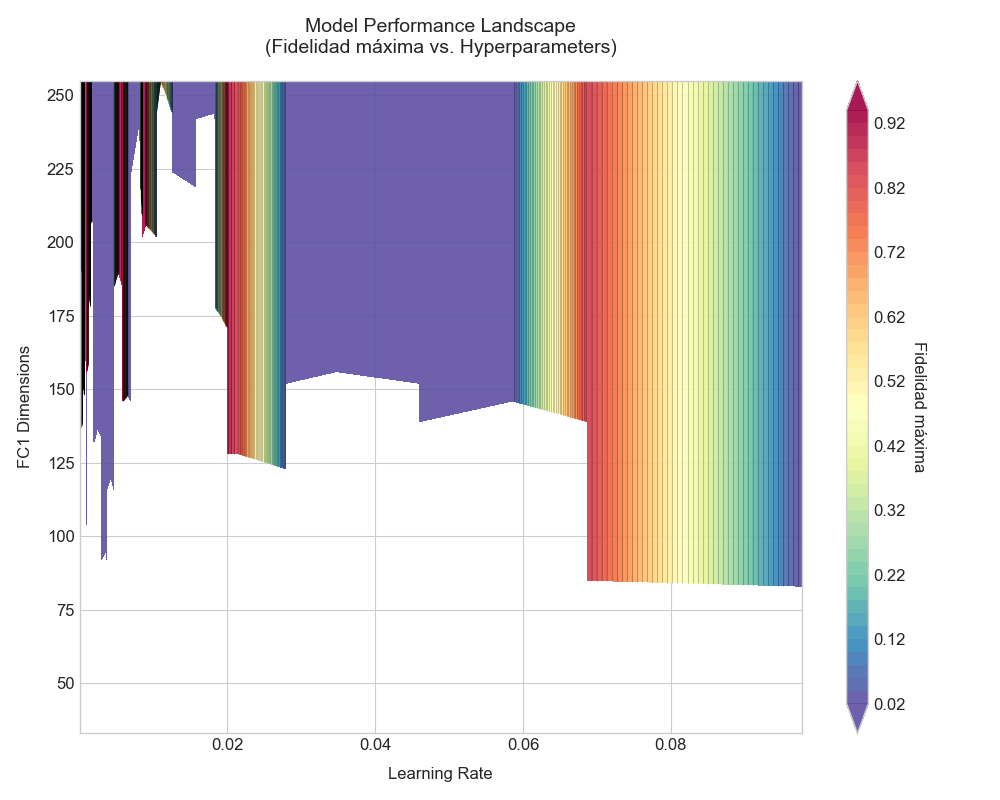

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For better color palettes

# 1. Load and prepare data
df = pd.read_csv('/home/sofi/Documents/resultadosccad/og_zhang_optuna.csv', delimiter=',')

# 2. Pivot with error handling
try:
    pivot_table = df.pivot_table(
        index='fc1_dims', 
        columns='learning_rate', 
        values='max_fid',
        aggfunc='mean'  # Handles duplicates by averaging
    )
except KeyError as e:
    raise ValueError(f"Column not found: {e}. Check your column names.")

# 3. Convert to numeric arrays
x = pd.to_numeric(pivot_table.columns, errors='coerce')
y = pd.to_numeric(pivot_table.index, errors='coerce')
z = pivot_table.values

# 4. Handle missing/invalid data
if np.isnan(z).any():
    print("Warning: NaN values found. Interpolating...")
    z = pd.DataFrame(z).interpolate().values

# 5. Create figure with professional styling
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')  # Clean background with grid

# 6. Enhanced contour plot
contour = plt.contourf(
    x, y, z, 
    levels=50,  # Optimal for readability
    cmap='Spectral_r',  # More visually appealing than viridis
    alpha=0.9,  # Slight transparency
    extend='both'  # Shows values beyond level limits
)

# 7. Add contour lines
plt.contour(
    x, y, z, 
    levels=50,
    colors='black',
    linewidths=0.5,
    linestyles='solid',
    alpha=0.3
)

# 8. Professional colorbar
cbar = plt.colorbar(contour, pad=0.05, aspect=30)
cbar.set_label('Fidelidad máxima', rotation=270, labelpad=15)

# 9. Labels and title with improved typography
plt.xlabel('Learning Rate', fontsize=12, labelpad=10)
plt.ylabel('FC1 Dimensions', fontsize=12, labelpad=10)
plt.title(
    'Model Performance Landscape\n(Fidelidad máxima vs. Hyperparameters)', 
    fontsize=14, 
    pad=20
)

# 10. Optimize layout and save
plt.tight_layout()
plt.savefig('hyperparameter_contour.png', dpi=300, bbox_inches='tight')
plt.show()